<a href="https://colab.research.google.com/github/caole26/caole26/blob/main/KMeans_testing_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install additional packages if necessary
!pip install matplotlib seaborn

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

# Create a DataFrame for better visualization
df = pd.DataFrame(data, columns=feature_names)
df['species'] = target  # Add species column for reference

# Display basic info
print("Dataset Preview:")
print(df.head())

print("\nFeature Names:")
print(feature_names)


Dataset Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Feature Names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)


In [ ]:
# Apply K-Means
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_normalized)

# Get cluster labels
clusters = kmeans.labels_

# Add cluster labels to the DataFrame
df['cluster'] = clusters

# Display a sample of the DataFrame
print("Clustered Data Preview:")
print(df.head())


Clustered Data Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species      PCA1      PCA2  cluster  
0        0 -2.264703  0.480027        1  
1        0 -2.080961 -0.674134        2  
2        0 -2.364229 -0.341908        2  
3        0 -2.299384 -0.597395        2  
4        0 -2.389842  0.646835        1  


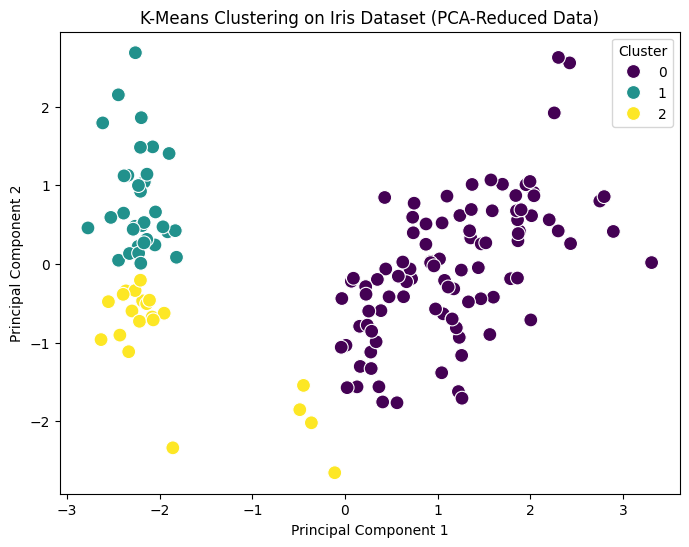

In [ ]:
# Reduce to 2D using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

# Add PCA results to DataFrame
df['PCA1'] = data_pca[:, 0]
df['PCA2'] = data_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df, palette='viridis', s=100)
plt.title("K-Means Clustering on Iris Dataset (PCA-Reduced Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate inertia and silhouette score
inertia = kmeans.inertia_
silhouette = silhouette_score(data_normalized, clusters)

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette:.2f}")


Inertia: 191.02473685317958
Silhouette Score: 0.48


In [ ]:
# Compare clusters and true labels
contingency_table = pd.crosstab(df['species'], df['cluster'], rownames=['Actual'], colnames=['Cluster'])
print("\nContingency Table:")
print(contingency_table)



Contingency Table:
Cluster   0   1   2
Actual             
0         0  33  17
1        46   0   4
2        50   0   0
